# California Housing - linear regression, kmeans clustering, Random forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('cal_housing.data')
df.columns = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']

In [3]:
df.head(5)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [4]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.917825,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.248495,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,295.500000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20639 non-null  float64
 1   latitude          20639 non-null  float64
 2   housingMedianAge  20639 non-null  float64
 3   totalRooms        20639 non-null  float64
 4   totalBedrooms     20639 non-null  float64
 5   population        20639 non-null  float64
 6   households        20639 non-null  float64
 7   medianIncome      20639 non-null  float64
 8   medianHouseValue  20639 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.isnull().any()

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


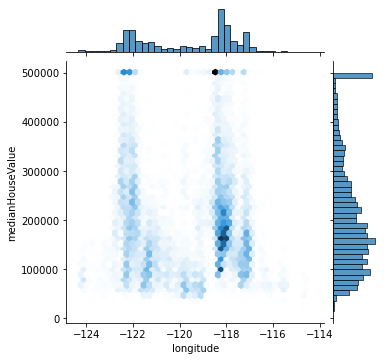

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


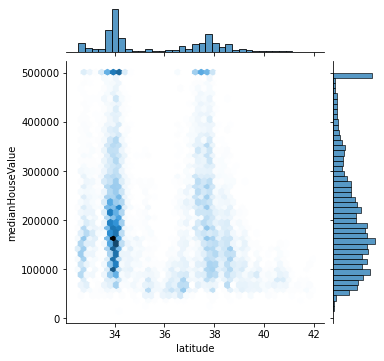

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


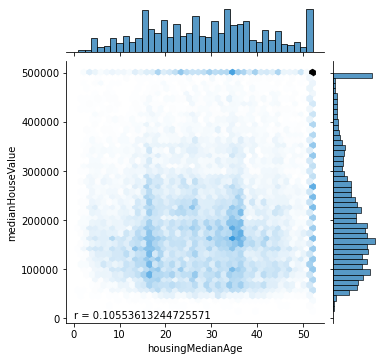

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


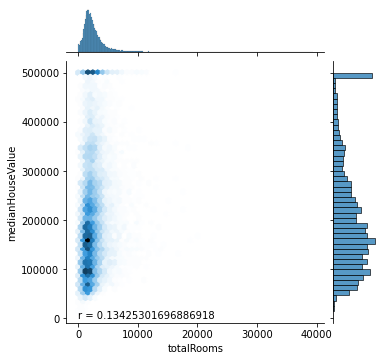

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


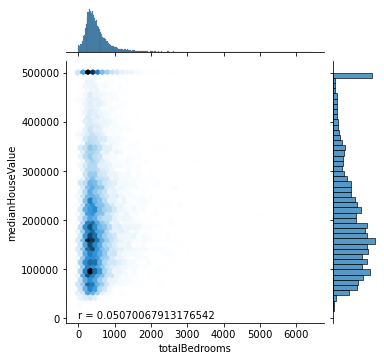

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


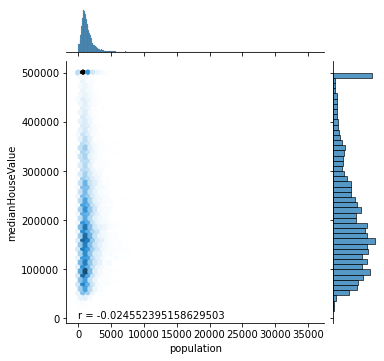

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


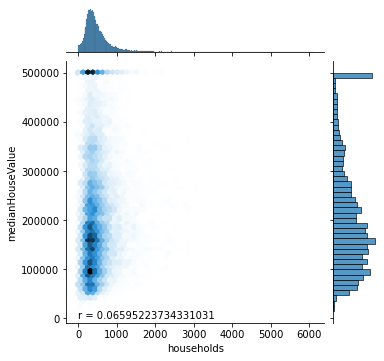

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


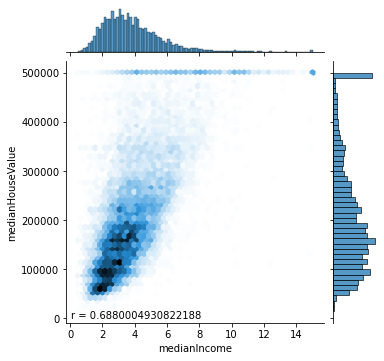

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


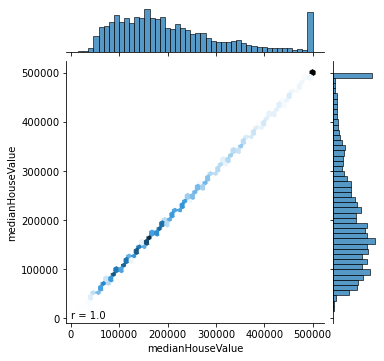

In [7]:
def make_plot(column):
    g = sns.jointplot(df[column],df['medianHouseValue'], kind='hex')
    #r,p=stats.pearsonr(df[column],df['medianHouseValue'] )
    r,_ = stats.pearsonr(df[column],df['medianHouseValue'])
    if column != 'longitude' and column !='latitude':
        g.ax_joint.annotate(text='r = {}'.format(r), xy=(0.05,0.05))
    g.fig.set_size_inches((5,5))
    plt.show()

for column in df.columns:
    make_plot(column)

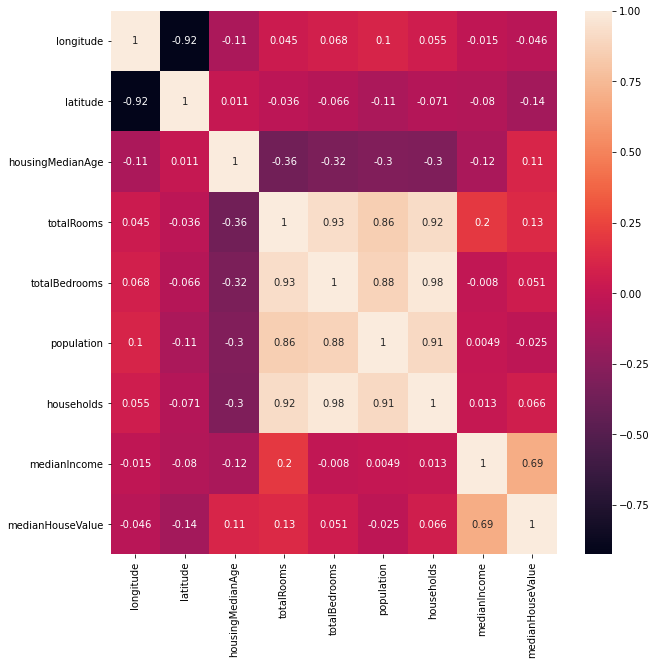

In [8]:
corr_y = df.corr()
g = sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values, annot=True)
g.figure.set_size_inches((10,10))

Points:
- Why so many values at 50000 and age 50?
- MedianIncome shows a high correlaiton with the median income
- Housholds, total bedrroms, total rooms and population have high correlations
- I should do something with the lalitude and longitude
- Features do not appear to have normal distribuition

#### 500000

In [9]:
df.duplicated().any()

False

In [10]:
df[df['medianHouseValue']>490000]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
88,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0
458,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0
492,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0
493,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0
508,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0
...,...,...,...,...,...,...,...,...,...
20421,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0
20425,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0
20426,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0
20435,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0


In [11]:
sum(df['medianHouseValue']==500001.0)/len(df)

0.046756141285915015

In [12]:
df[df['housingMedianAge']>49]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
5,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
...,...,...,...,...,...,...,...,...,...
20234,-119.27,34.28,50.0,1710.0,412.0,915.0,380.0,3.1757,206300.0
20235,-119.27,34.27,52.0,459.0,112.0,276.0,107.0,2.3750,198400.0
20236,-119.27,34.27,52.0,1577.0,343.0,836.0,335.0,3.5893,206600.0
20442,-118.85,34.27,50.0,187.0,33.0,130.0,35.0,3.3438,500001.0


In [13]:
sum(df['housingMedianAge']==52.0)/len(df)

0.061679344929502396

So many values at 5000001.0 and age 52 is weird, seems like there was a cutoff, and all values above 500001 defaulted to it?
I'm not sure why this values are like this, so I don't know if they are ok...

In [14]:
_filter_value = df['medianHouseValue']!=500001.0
_filter_age = df['housingMedianAge']!=52.0
#df[_filter_value & _filter_age]

#### Latitude and longitude

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


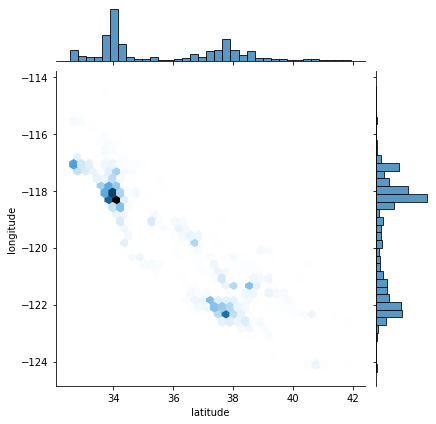

In [15]:
g = sns.jointplot(df['latitude'],df['longitude'], kind='hex')
plt.show()

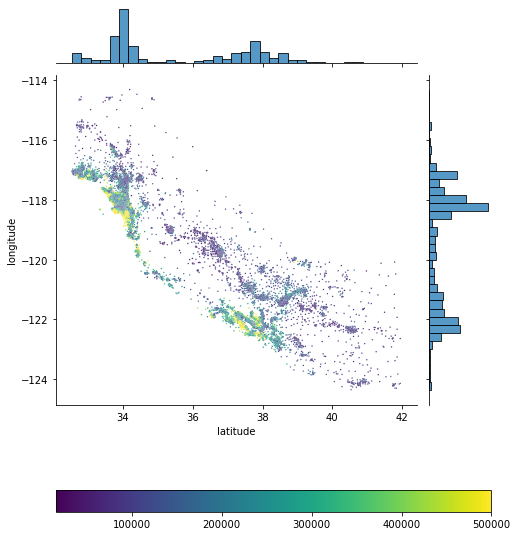

In [16]:
g = sns.jointplot(x=df['latitude'],y=df['longitude'], c=df['medianHouseValue'], joint_kws={"color":None, 'cmap':'viridis'}, s=2)
g.fig.colorbar(g.ax_joint.collections[0], ax=[g.ax_joint, g.ax_marg_y, g.ax_marg_x], use_gridspec=True, orientation='horizontal')
g.fig.set_size_inches((7,9))
plt.show()

Clusters or distance to nearest city?

In [17]:
from sklearn.cluster import KMeans
x = df[['longitude', 'latitude']].to_numpy()

kmeans = KMeans(n_clusters=200).fit(x)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[60 60 60 ... 25 25 25]


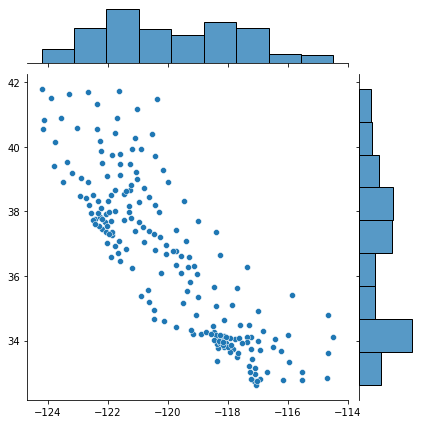

In [18]:
g = sns.jointplot( kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
print(kmeans.labels_)

In [19]:
df['cluster'] = kmeans.predict(x)

In [20]:
Big_city = pd.DataFrame(columns=['name', 'latitude', 'longitude'], data=[
    ['los angeles', 34.052, -118.224],
    ['san diego', 32.716, -117.165],
    ['san jose', 37.339 , -121.895],
    ['san francisco', 37.775 , -122.419],
    ['fresno', 36.748 , -119.772],
    ['sacramento', 38.582 , -121.494],
    ['long beach', 33.767 , -118.189],
    ['oakland', 37.804 , -122.271],
    ['backersfield', 35.373 , -119.019],
    ['anaheim',33.835 , -117.915 ],
    ['sanat ana', 33.746 , -117.868 ],
    ['riverside', 33.953 , -117.396]
])

from https://www.geonames.org/US/CA/largest-cities-in-california.html

In [21]:
Big_city

,name,latitude,longitude
0,los angeles,34.052,-118.224
1,san diego,32.716,-117.165
2,san jose,37.339,-121.895
3,san francisco,37.775,-122.419
4,fresno,36.748,-119.772
5,sacramento,38.582,-121.494
6,long beach,33.767,-118.189
7,oakland,37.804,-122.271
8,backersfield,35.373,-119.019
9,anaheim,33.835,-117.915


In [22]:
for row in Big_city.iterrows():
    df[row[1][0]] = np.sqrt( (df['longitude']-row[1][2])**2 + (df['latitude']-row[1][1])**2)


#x =[{row[1][0]:np.sqrt( (df['longitude']-row[1][2])**2 + (df['latitude']-row[1][1])**2) }for row in Big_city.iterrows()]

In [23]:
df['distance']=df[Big_city['name'].values].min(axis=1)

#### New features, because 

Get the average number of rooms, average number of bedrooms (per house) and average size of a household.

In [24]:
df['AveRooms'] = df['totalRooms']/df['households']
df['AveBedrooms'] = df['totalBedrooms']/df['households']
df['AveHousehold'] = df['population']/df['households']

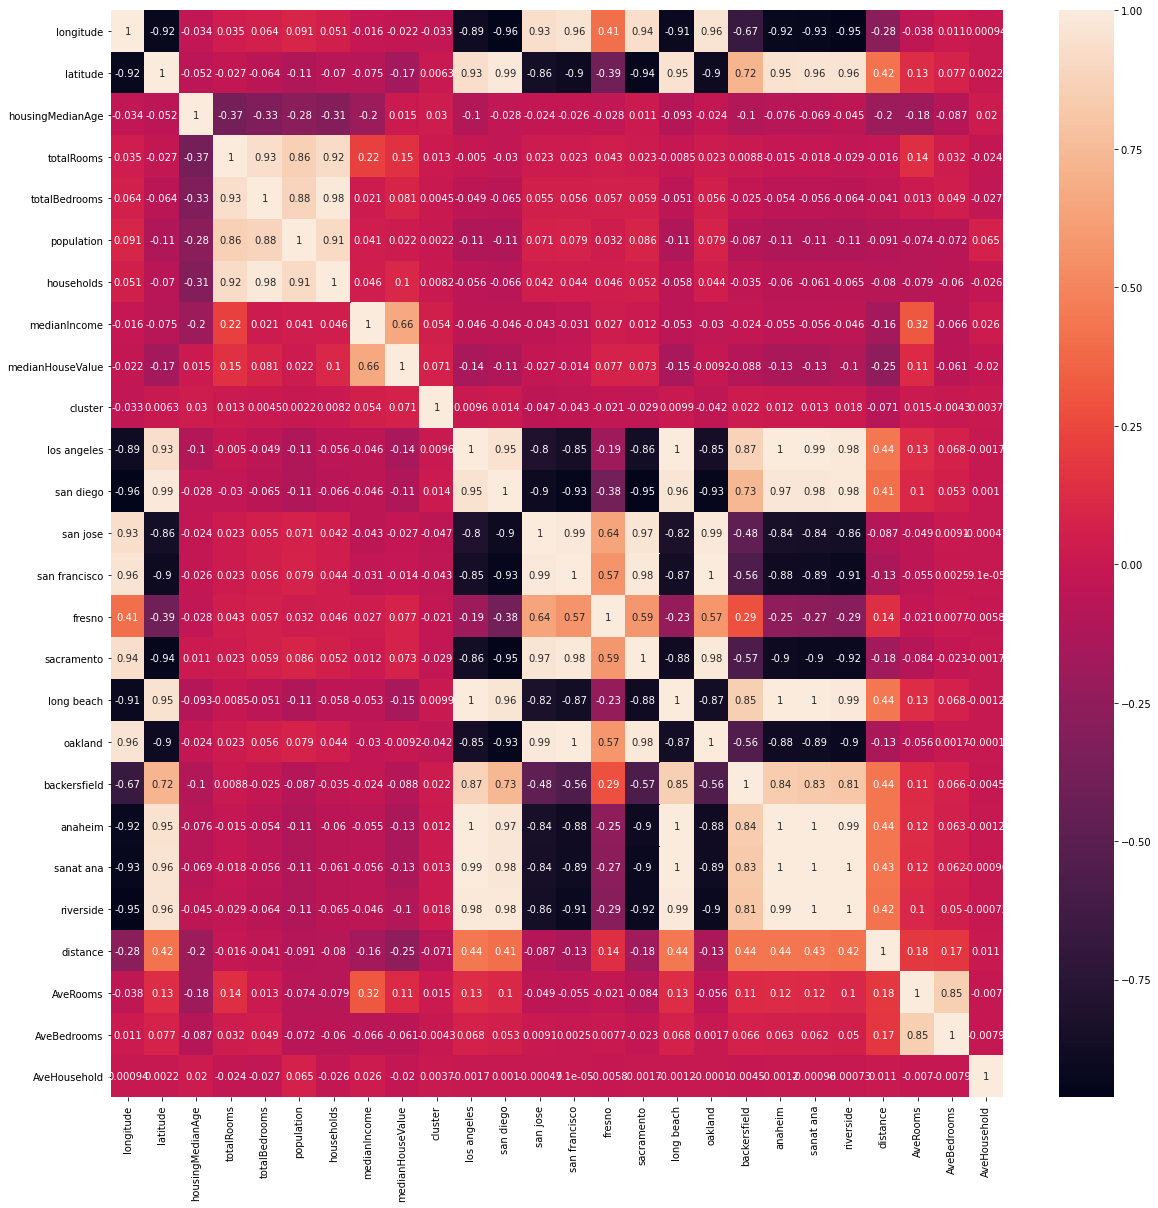

In [28]:
corr_y = df[_filter_value & _filter_age].corr()
g = sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values, annot=True)
g.figure.set_size_inches((20,20))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housingMedianAge'}>,
        <AxesSubplot:title={'center':'totalRooms'}>,
        <AxesSubplot:title={'center':'totalBedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'medianIncome'}>,
        <AxesSubplot:title={'center':'medianHouseValue'}>,
        <AxesSubplot:title={'center':'cluster'}>],
       [<AxesSubplot:title={'center':'los angeles'}>,
        <AxesSubplot:title={'center':'san diego'}>,
        <AxesSubplot:title={'center':'san jose'}>,
        <AxesSubplot:title={'center':'san francisco'}>,
        <AxesSubplot:title={'center':'fresno'}>],
       [<AxesSubplot:title={'center':'sacramento'}>,
        <AxesSubplot:title={'center':'long beach'}>,
        <AxesSubplot:title={'center':'oakland'}>,
        <AxesSubplot:title={'center':'

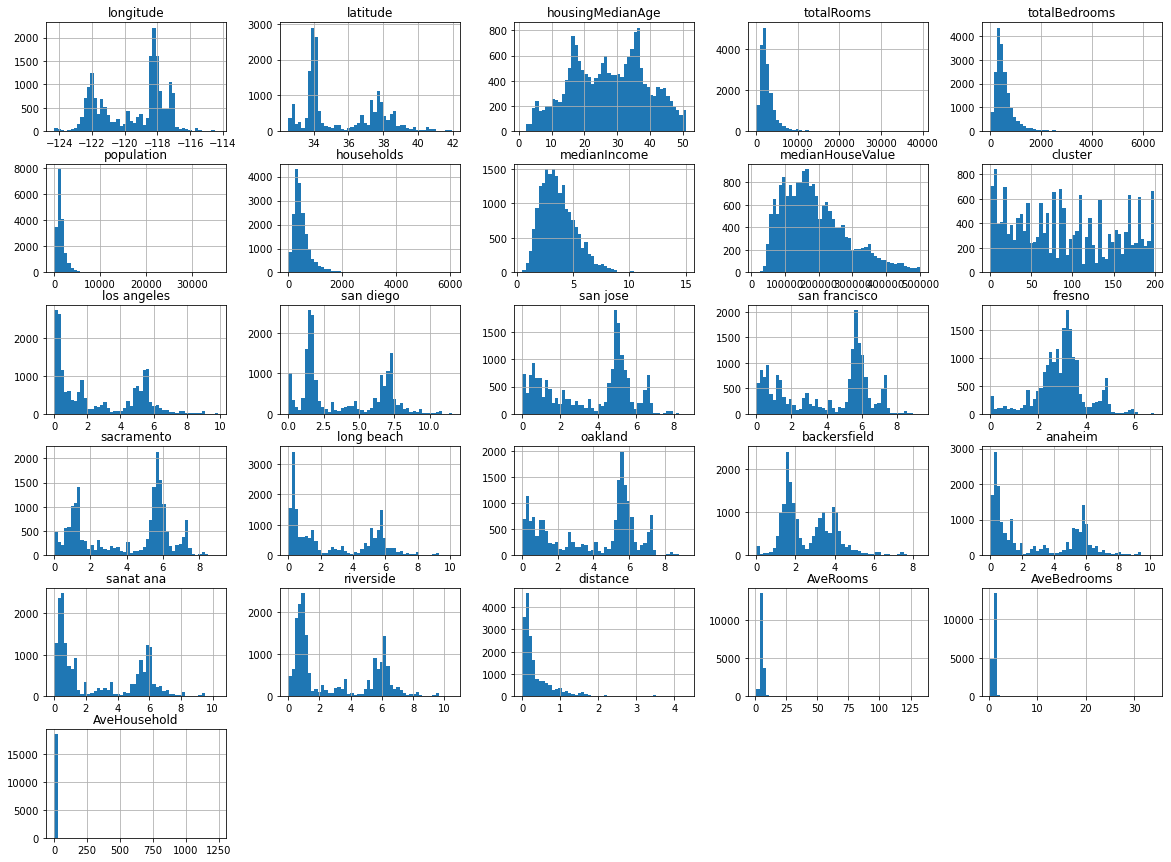

In [29]:
df[_filter_value & _filter_age].hist(figsize=(20,15), bins=50)

In [32]:
print(df[_filter_value & _filter_age]['AveBedrooms'].max())
print(df[_filter_value & _filter_age]['AveRooms'].max())
print(df[_filter_value & _filter_age]['AveHousehold'].max())

df[_filter_value & _filter_age].describe()

34.06666666666667
132.53333333333333
1243.3333333333333


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,cluster,...,long beach,oakland,backersfield,anaheim,sanat ana,riverside,distance,AveRooms,AveBedrooms,AveHousehold
count,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,...,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000,18571.000000
mean,-119.484782,35.593108,26.983092,2668.937322,548.046470,1470.454795,508.741963,3.693013,189593.446610,90.898121,...,2.708188,3.901043,2.661819,2.746969,2.805548,2.995303,0.405879,5.386871,1.098447,3.108626
std,1.980816,2.147704,11.431660,2223.850924,429.262367,1162.945084,389.567628,1.569719,95773.372707,61.014875,...,2.493105,2.443163,1.309968,2.558412,2.586669,2.572409,0.522154,2.337930,0.463811,10.811941
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,...,0.003162,0.004123,0.003162,0.007071,0.004472,0.005000,0.002828,0.846154,0.333333,0.692308
25%,-121.550000,33.920000,17.000000,1455.000000,300.000000,811.000000,284.000000,2.537250,115400.000000,36.000000,...,0.379117,1.230100,1.612393,0.418151,0.486806,0.795164,0.106019,4.430190,1.005801,2.469410
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.467900,171200.000000,86.000000,...,1.526961,5.209025,2.167545,1.395224,1.334054,1.304226,0.205572,5.208772,1.048309,2.855850
75%,-117.970000,37.670000,36.000000,3184.000000,659.000000,1781.000000,614.000000,4.615750,243200.000000,147.000000,...,5.327055,5.795335,3.680827,5.461250,5.557053,5.751619,0.506732,5.989167,1.099193,3.320678
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,199.000000,...,10.125100,9.200753,8.349314,10.239543,10.338446,10.481888,4.299791,132.533333,34.066667,1243.333333


In [41]:
_filter_household = df['AveHousehold']<50
aux = df[_filter_value & _filter_age]
aux[aux['AveHousehold']>50]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,cluster,...,long beach,oakland,backersfield,anaheim,sanat ana,riverside,distance,AveRooms,AveBedrooms,AveHousehold
3363,-120.51,40.41,36.0,36.0,8.0,4198.0,7.0,5.5179,67500.0,18,...,7.036795,3.145212,5.253042,7.068568,7.168616,7.168671,2.076015,5.142857,1.142857,599.714286
9171,-118.59,34.47,5.0,538.0,98.0,8733.0,105.0,4.2391,154600.0,143,...,0.809327,4.966419,0.999725,0.926742,1.022477,1.301125,0.555590,5.123810,0.933333,83.171429
12103,-117.33,33.97,8.0,152.0,19.0,1275.0,20.0,1.6250,162500.0,117,...,0.882661,6.254042,2.195707,0.600375,0.582769,0.068154,0.068154,7.600000,0.950000,63.750000
16419,-121.29,37.89,26.0,161.0,27.0,1542.0,30.0,5.7485,162500.0,24,...,5.159005,0.984762,3.390093,5.275761,5.374274,5.537437,0.721443,5.366667,0.900000,51.400000
16668,-120.70,35.32,46.0,118.0,17.0,6532.0,13.0,4.2639,350000.0,160,...,2.952445,2.939098,1.681835,3.156176,3.240015,3.575627,1.681835,9.076923,1.307692,502.461538
19005,-121.98,38.32,45.0,19.0,5.0,7460.0,6.0,10.2264,137500.0,149,...,5.924651,0.592399,4.177599,6.053053,6.150611,6.331172,0.552123,3.166667,0.833333,1243.333333


In [49]:
_filter_bedrooms = df['AveBedrooms']<15
aux[aux['AveBedrooms']>15]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,cluster,...,long beach,oakland,backersfield,anaheim,sanat ana,riverside,distance,AveRooms,AveBedrooms,AveHousehold
1978,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.625,162500.0,32,...,5.376520,2.406761,3.587485,5.416498,5.516870,5.540511,1.430706,132.533333,34.066667,2.40
11861,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.625,67500.0,176,...,7.187401,2.669007,5.381261,7.247858,7.348503,7.399852,1.705544,59.875000,15.312500,1.75


In [48]:
_filter_rooms = df['AveRooms']<80
aux[aux['AveRooms']>80]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,cluster,...,long beach,oakland,backersfield,anaheim,sanat ana,riverside,distance,AveRooms,AveBedrooms,AveHousehold
1978,-120.08,38.8,34.0,1988.0,511.0,36.0,15.0,4.625,162500.0,32,...,5.37652,2.406761,3.587485,5.416498,5.51687,5.540511,1.430706,132.533333,34.066667,2.4


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housingMedianAge'}>,
        <AxesSubplot:title={'center':'totalRooms'}>,
        <AxesSubplot:title={'center':'totalBedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'medianIncome'}>,
        <AxesSubplot:title={'center':'medianHouseValue'}>,
        <AxesSubplot:title={'center':'cluster'}>],
       [<AxesSubplot:title={'center':'los angeles'}>,
        <AxesSubplot:title={'center':'san diego'}>,
        <AxesSubplot:title={'center':'san jose'}>,
        <AxesSubplot:title={'center':'san francisco'}>,
        <AxesSubplot:title={'center':'fresno'}>],
       [<AxesSubplot:title={'center':'sacramento'}>,
        <AxesSubplot:title={'center':'long beach'}>,
        <AxesSubplot:title={'center':'oakland'}>,
        <AxesSubplot:title={'center':'

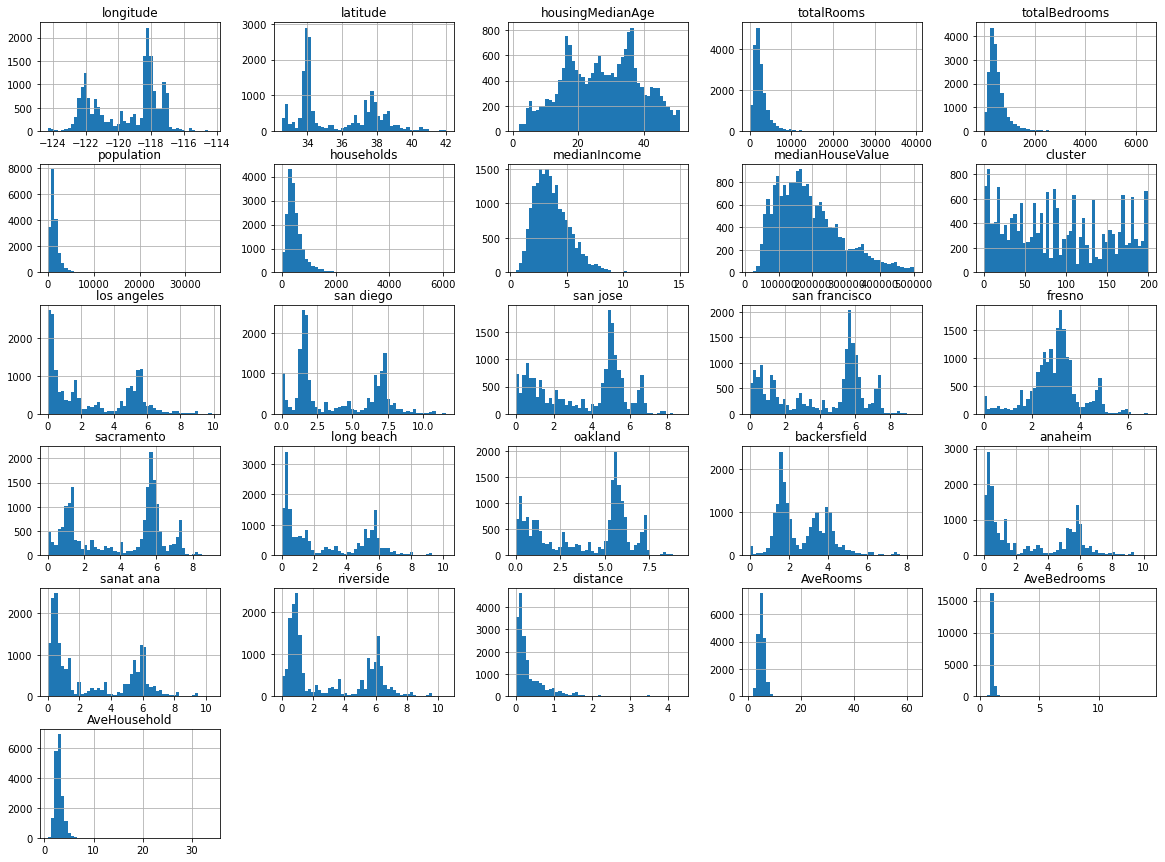

In [131]:
df[_filter_value & _filter_age & _filter_bedrooms & _filter_household & _filter_rooms].hist(figsize=(20,15), bins=50)

Using AveRooms, Ave BedRooms and AveHousehold, removes the correlations to some of the high correlations between population, households, totalbedrooms and totalroom

Best not to use the distances for each city (very correlated between them)

The correlation between the distance to the neerest city to the price is better than for the latitude and longitude

The cluster migth be usefull for a model that is not linear regression, one hot encondings for 200 clusters seems dumb.


First test:
- use the initial variables ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']
- ['distance', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']
- use ['distance', 'houseMedianAge', 'population', 'medianIncome', 'AveRooms', 'AveBedrooms', 'AveHousehold']
- use all except city distances and cluster
- use all

ignore value>500000 and age>52

In [47]:
df.columns

Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',
       'medianHouseValue', 'cluster', 'los angeles', 'san diego', 'san jose',
       'san francisco', 'fresno', 'sacramento', 'long beach', 'oakland',
       'backersfield', 'anaheim', 'sanat ana', 'riverside', 'distance',
       'AveRooms', 'AveBedrooms', 'AveHousehold'],
      dtype='object')

#### Data for tests

In [50]:
X_1 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms][['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']]
Y_1 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms]['medianHouseValue']

In [51]:
X_2 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms][['distance', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']]
Y_2 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms]['medianHouseValue']

In [52]:
X_3 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms][['distance', 'housingMedianAge', 'AveRooms', 'AveBedrooms', 'population', 'AveHousehold', 'medianIncome']]
Y_3 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms]['medianHouseValue']

In [53]:
X_4 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms][['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome','distance', 'AveRooms', 'AveBedrooms', 'AveHousehold']]
Y_4 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms]['medianHouseValue']

In [95]:
X_5 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms][df.columns.difference(['medianHouseValue', 'cluster'])]
Y_5 = df[_filter_value & _filter_age & _filter_household & _filter_bedrooms & _filter_rooms]['medianHouseValue']

#### Split data into training and testing

In [118]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.3, random_state=501)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=501)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, Y_3, test_size=0.3, random_state=501)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, Y_4, test_size=0.3, random_state=501)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, Y_5, test_size=0.3, random_state=501)

#### Scale data

In [119]:
mm_scaler = preprocessing.StandardScaler()
X_train_1_scaled = mm_scaler.fit_transform(X_train_1)
X_test_1_scaled = mm_scaler.transform(X_test_1)

X_train_2_scaled = mm_scaler.fit_transform(X_train_2)
X_test_2_scaled = mm_scaler.transform(X_test_2)

X_train_3_scaled = mm_scaler.fit_transform(X_train_3)
X_test_3_scaled = mm_scaler.transform(X_test_3)

X_train_4_scaled = mm_scaler.fit_transform(X_train_4)
X_test_4_scaled = mm_scaler.transform(X_test_4)

X_train_5_scaled = mm_scaler.fit_transform(X_train_5)
X_test_5_scaled = mm_scaler.transform(X_test_5)

In [120]:
lm1 = LinearRegression()
lm1.fit(X_train_1_scaled,y_train_1)
print(lm1.coef_)
print(lm1.intercept_)
print(lm1.rank_)
print(X_train_1.columns)

[-77025.27858029 -82643.06875752   8537.18758972 -21967.38374354
  44154.4469572  -34277.28675881  15729.56535375  62096.86788963]
189135.16215176252
8
Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome'],
      dtype='object')


In [121]:
lm2 = LinearRegression()
lm2.fit(X_train_2_scaled,y_train_2)
print(lm2.coef_)
print(lm2.intercept_)
print(lm2.rank_)
print(X_train_2.columns)

[ -7241.74630417  15124.94251356 -44852.95485276  44628.45088085
 -30951.23365917  36020.68952627  73706.09491651]
189135.16215176237
7
Index(['distance', 'housingMedianAge', 'totalRooms', 'totalBedrooms',
       'population', 'households', 'medianIncome'],
      dtype='object')


In [122]:
lm3 = LinearRegression()
lm3.fit(X_train_3_scaled,y_train_3)
print(lm3.coef_)
print(lm3.intercept_)
print(lm3.rank_)
print(X_train_3.columns)

[ -7743.48791397  14169.75857264 -40237.01059178  34828.35296357
   4817.00360843 -18615.63647316  80257.27411809]
189135.16215176237
7
Index(['distance', 'housingMedianAge', 'AveRooms', 'AveBedrooms', 'population',
       'AveHousehold', 'medianIncome'],
      dtype='object')


In [123]:
lm4 = LinearRegression()
lm4.fit(X_train_4_scaled,y_train_4)
print(lm4.coef_)
print(lm4.intercept_)
print(lm4.rank_)
print(X_train_4.columns)

[-77047.34087496 -83807.80607158   8632.57557493 -16604.8558283
  22021.63772352  -9637.02992001   7971.32602535  64308.25596835
   -142.0223439   -9781.04102043  13968.99902307 -15012.37315631]
189135.16215176252
12
Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome', 'distance',
       'AveRooms', 'AveBedrooms', 'AveHousehold'],
      dtype='object')


In [124]:
lm5 = LinearRegression()
lm5.fit(X_train_5_scaled,y_train_5)
print(lm5.coef_)
print(lm5.intercept_)
print(lm5.rank_)
print(X_train_5.columns)

[  -1234.19324679  -16390.61543184    6411.84462038  932064.21727009
   48033.74886001    5885.51928363   17775.1022945     8241.23067808
    2193.28925196    2531.9103645   102064.4742158    24273.80466635
 -379186.20938334   51824.35206334  953641.42550106  -11828.21813728
  199539.12286531   15825.89185945  -32122.03873412 -932208.78140065
 -125271.60721838 -929435.91194641   11548.54964494   -5165.78559371]
189135.16215176196
24
Index(['AveBedrooms', 'AveHousehold', 'AveRooms', 'anaheim', 'backersfield',
       'distance', 'fresno', 'households', 'housingMedianAge', 'latitude',
       'long beach', 'longitude', 'los angeles', 'medianIncome', 'oakland',
       'population', 'riverside', 'sacramento', 'san diego', 'san francisco',
       'san jose', 'sanat ana', 'totalBedrooms', 'totalRooms'],
      dtype='object')


In [125]:
prediction1=lm1.predict(X_test_1_scaled)
prediction2=lm2.predict(X_test_2_scaled)
prediction3=lm3.predict(X_test_3_scaled)
prediction4=lm4.predict(X_test_4_scaled)
prediction5=lm5.predict(X_test_5_scaled)

In [126]:
print('MAE:',metrics.mean_absolute_error(y_test_1,prediction1))
print('MSA:',metrics.mean_squared_error(y_test_1,prediction1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_1,prediction1)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_1,prediction1))/y_test_1.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(y_train_1,lm1.predict(X_train_1_scaled))))

MAE: 44595.466235089145
MSA: 3556088716.868538
RMSE: 59632.94992593053
RMSE %: 31.269239683660526
RMSE train: 60112.71056041182


In [127]:
print('MAE:',metrics.mean_absolute_error(y_test_2,prediction2))
print('MSA:',metrics.mean_squared_error(y_test_2,prediction2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_2,prediction2)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_2,prediction2))/y_test_2.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(y_train_2,lm2.predict(X_train_2_scaled)))/y_test_2.mean()*100)

MAE: 48735.1543874983
MSA: 4228960134.787873
RMSE: 65030.45544041555
RMSE %: 34.09948527499797
RMSE train: 34.583646972482015


In [128]:
print('MAE:',metrics.mean_absolute_error(y_test_3,prediction3))
print('MSA:',metrics.mean_squared_error(y_test_3,prediction3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_3,prediction3)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_3,prediction3))/y_test_3.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(y_train_3,lm3.predict(X_train_3_scaled))))

MAE: 47805.125029489725
MSA: 4174542783.6480618
RMSE: 64610.701773375455
RMSE %: 33.87938249559371
RMSE train: 64933.9550717399


In [129]:
print('MAE:',metrics.mean_absolute_error(y_test_4,prediction4))
print('MSA:',metrics.mean_squared_error(y_test_4,prediction4))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_4,prediction4)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_4,prediction4))/y_test_4.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(y_train_4,lm4.predict(X_train_4_scaled))))

MAE: 43841.417852477774
MSA: 3529400716.99382
RMSE: 59408.75959817559
RMSE %: 31.151682844664048
RMSE train: 58847.26552263398


In [130]:
print('MAE:',metrics.mean_absolute_error(y_test_5,prediction5))
print('MSA:',metrics.mean_squared_error(y_test_5,prediction5))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_5,prediction5)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_5,prediction5))/y_test_5.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(y_train_5,lm5.predict(X_train_5_scaled))))

MAE: 39598.03835843017
MSA: 3056610101.193989
RMSE: 55286.61774058881
RMSE %: 28.990189208762562
RMSE train: 54333.7996459956


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


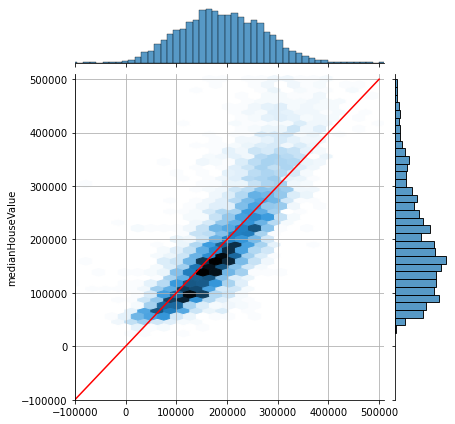

In [204]:
sns.jointplot(prediction5, y_test_5, kind='hex')
plt.plot(range(-100000,500000), range(-100000,500000), color='red')
plt.xlim(-100000, 510000)
plt.ylim(-100000, 510000)
plt.grid()

#### Features Normal distribuitions?

In [134]:
print(df.columns)
aux = df[_filter_age & _filter_bedrooms & _filter_household & _filter_rooms & _filter_value]

Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',
       'medianHouseValue', 'cluster', 'los angeles', 'san diego', 'san jose',
       'san francisco', 'fresno', 'sacramento', 'long beach', 'oakland',
       'backersfield', 'anaheim', 'sanat ana', 'riverside', 'distance',
       'AveRooms', 'AveBedrooms', 'AveHousehold'],
      dtype='object')


housingMedianAge



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.8955042347404077


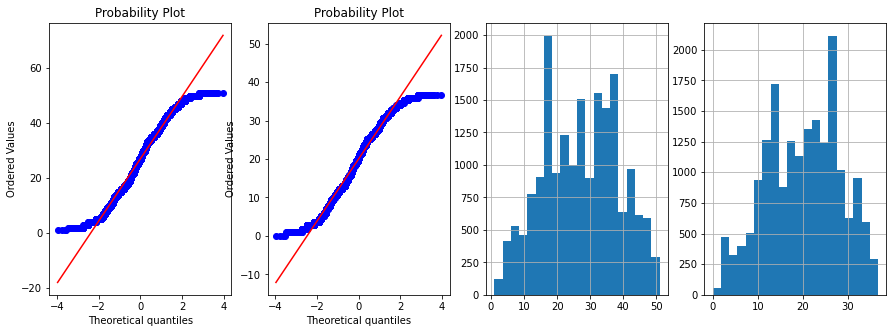

totalRooms
0.19842704881233642



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


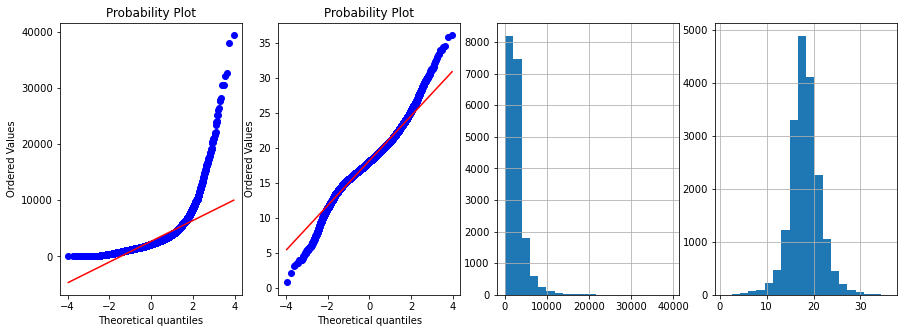

totalBedrooms



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.20402120437978705


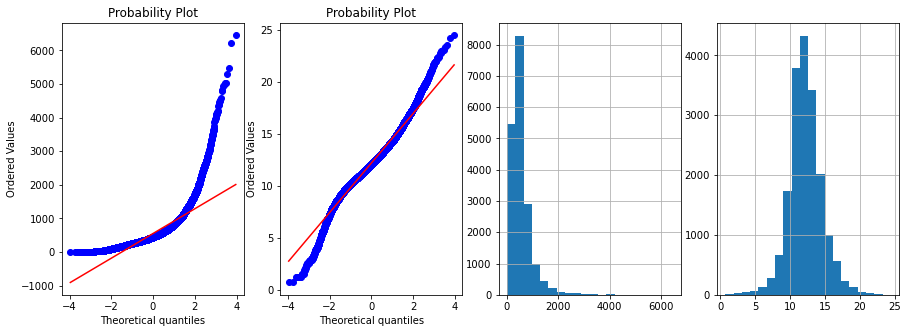

population



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.22838726777590176


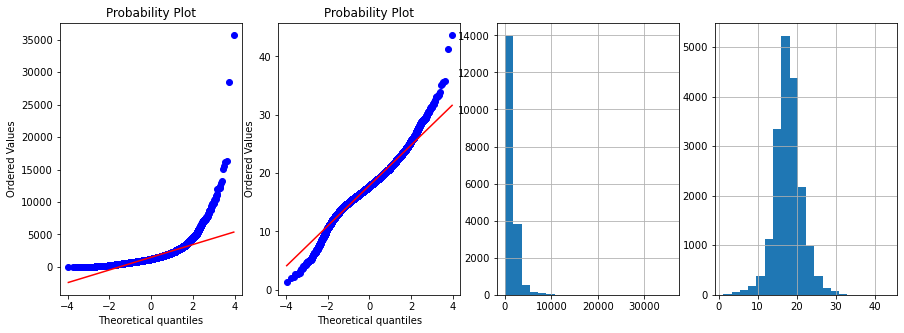

households



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.2270950453075024


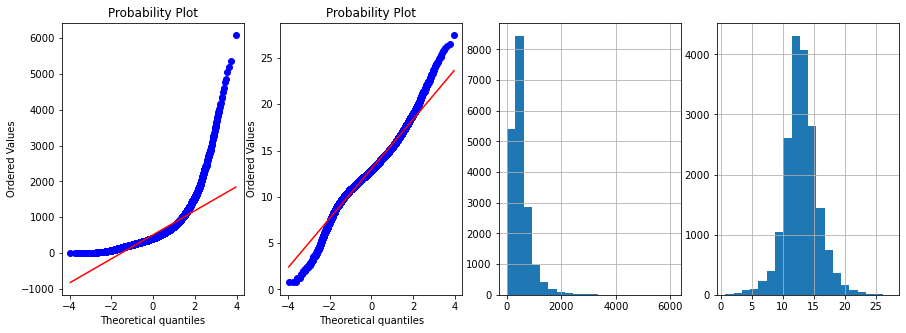

medianIncome
0.27283995427809293



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


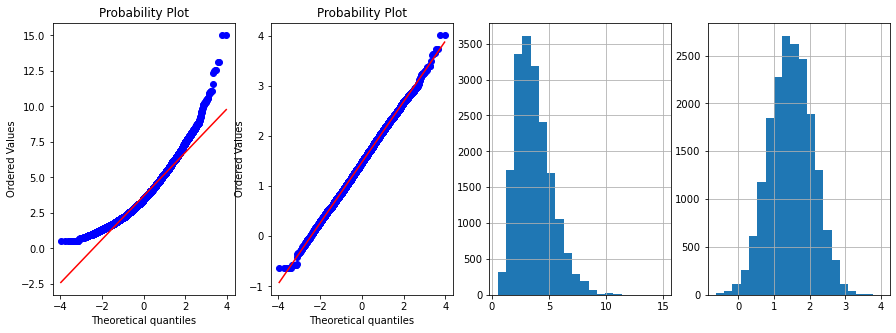

medianHouseValue



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.21872996241526918


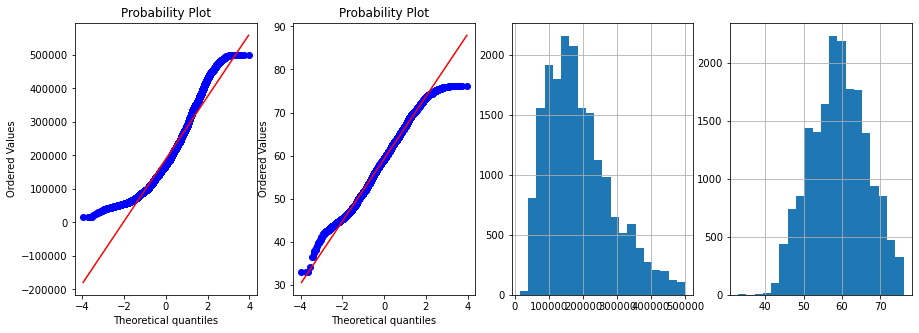

los angeles



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.22214026445524776


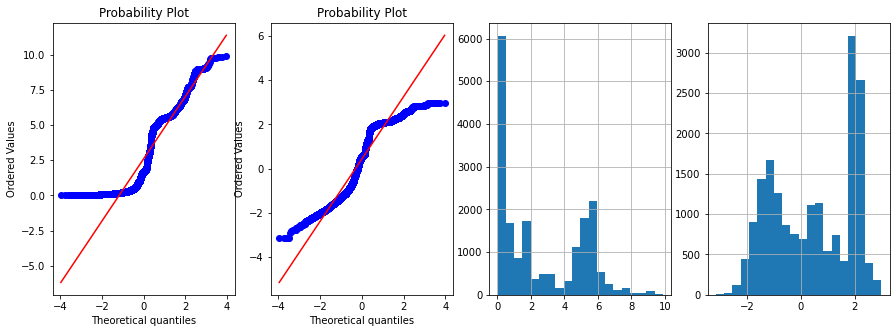

san diego



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.3987950475374013


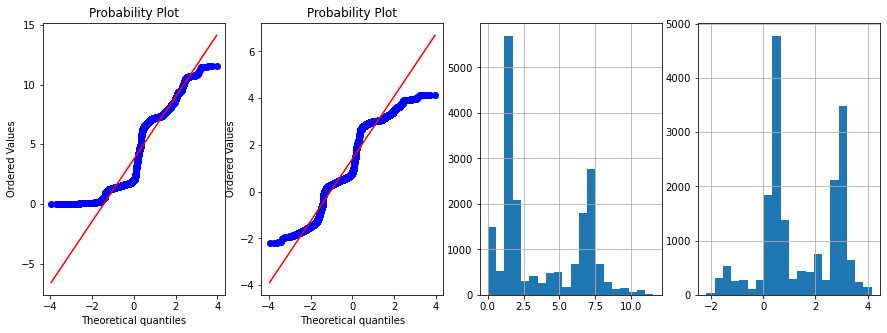

san jose



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.731105012126159


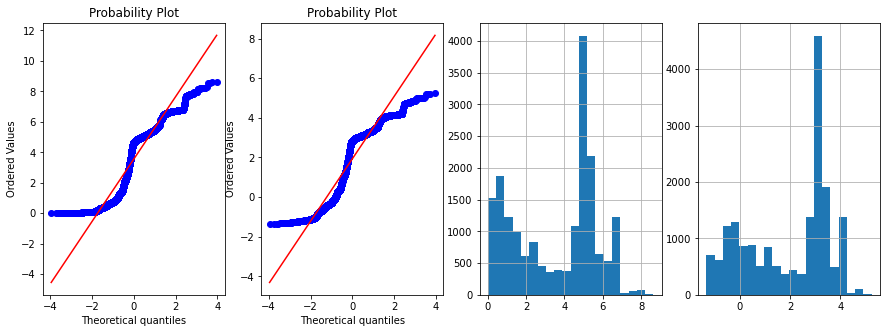

san francisco



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.7291287192478814


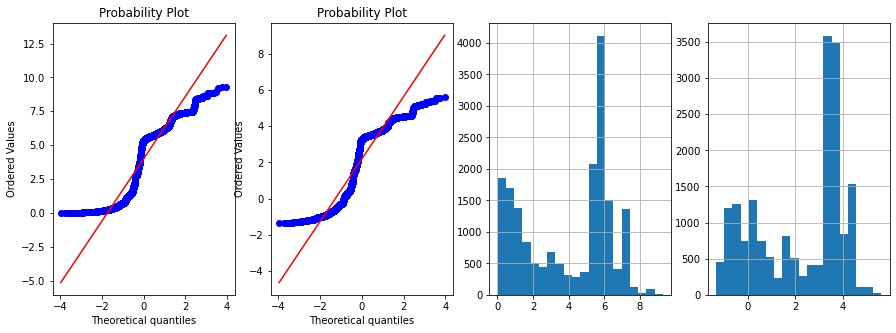

fresno



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1.0739640581277419


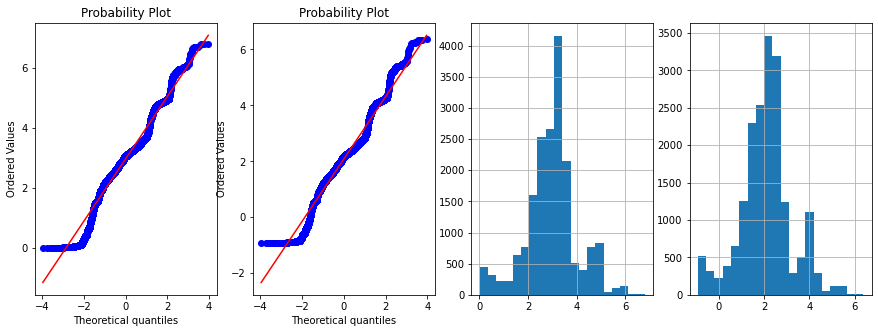

sacramento
0.7163751817830016



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


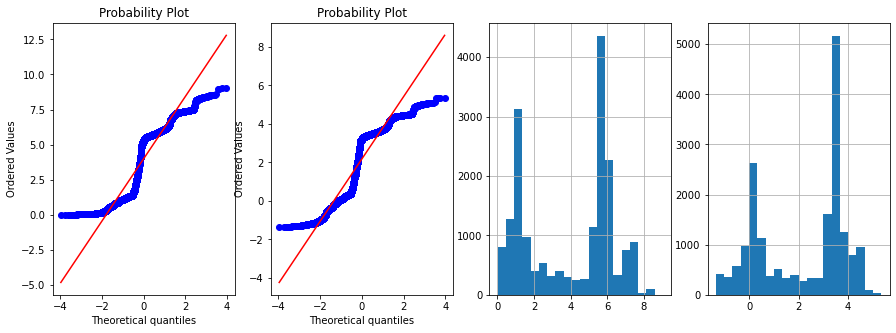

long beach
0.18828966081387655



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


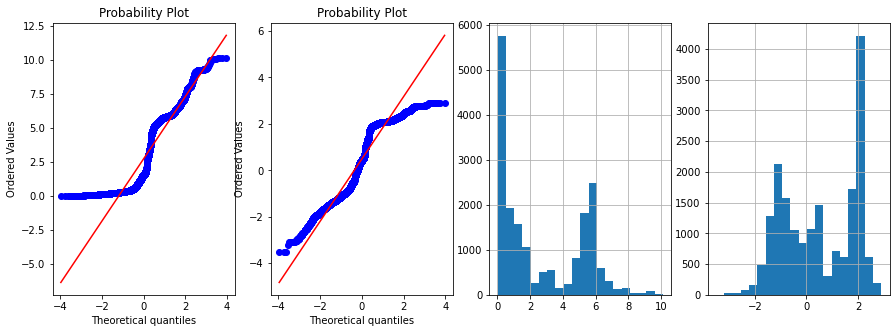

oakland



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.7058869092731584


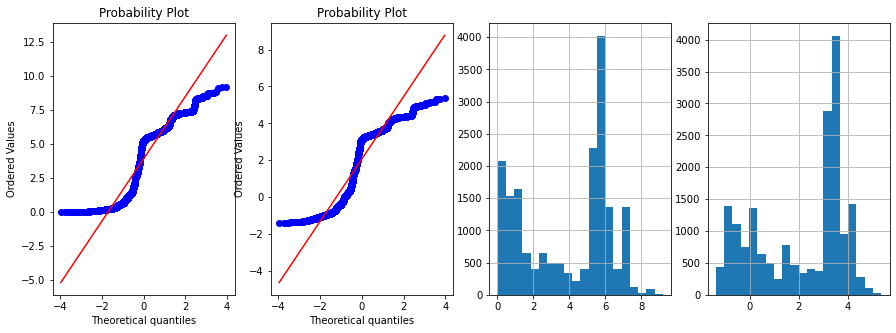

backersfield
0.5387264334596709



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


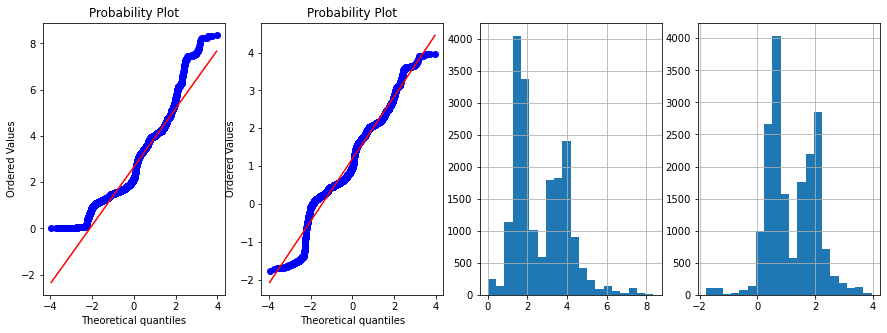

anaheim
0.18408724349173053



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


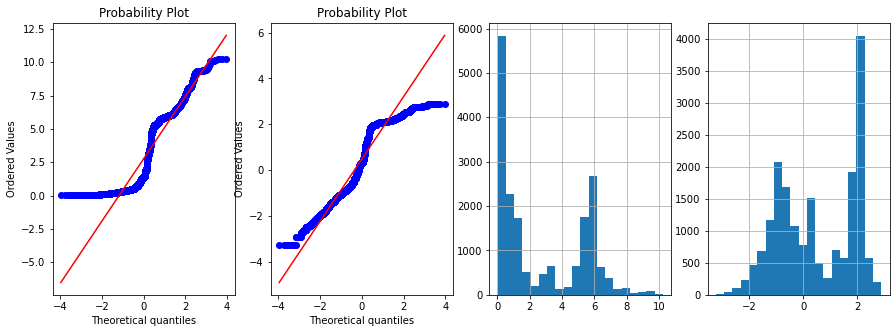

sanat ana
0.18230216988529066



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


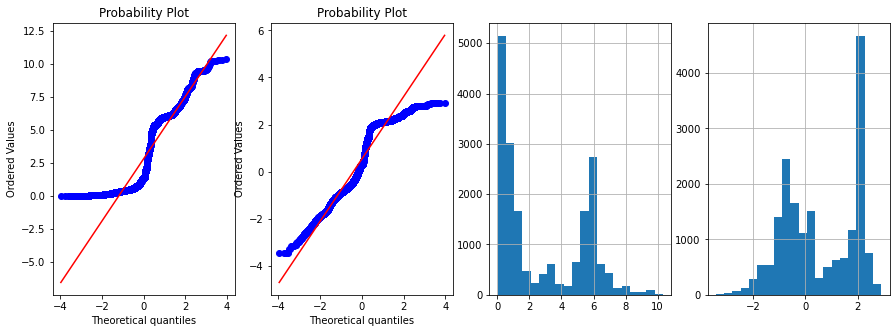

riverside
0.16728194460608775



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


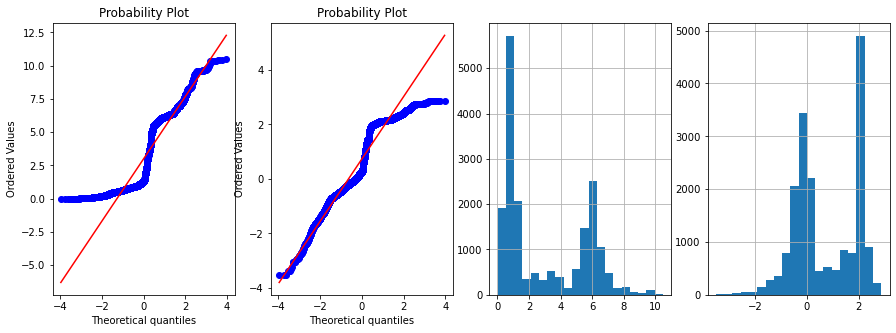

distance



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.00114833021965779


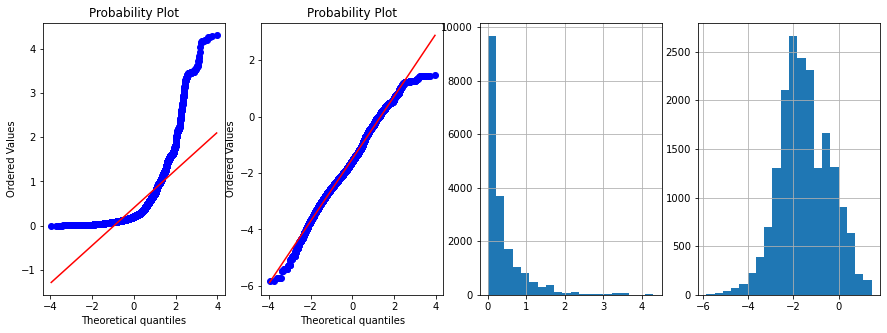

AveRooms
-0.3175388670913031



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


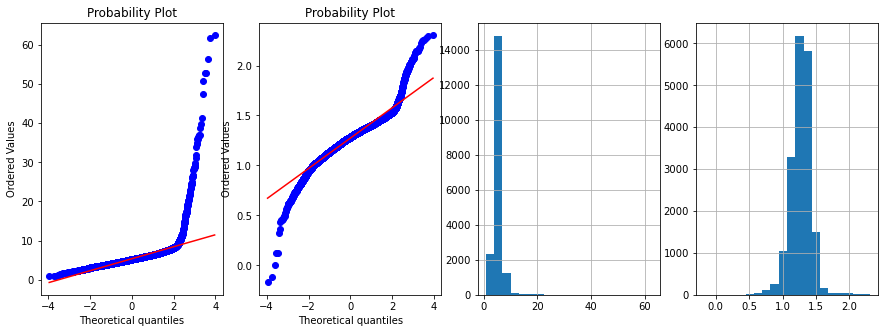

AveBedrooms
-1.696305063650242



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


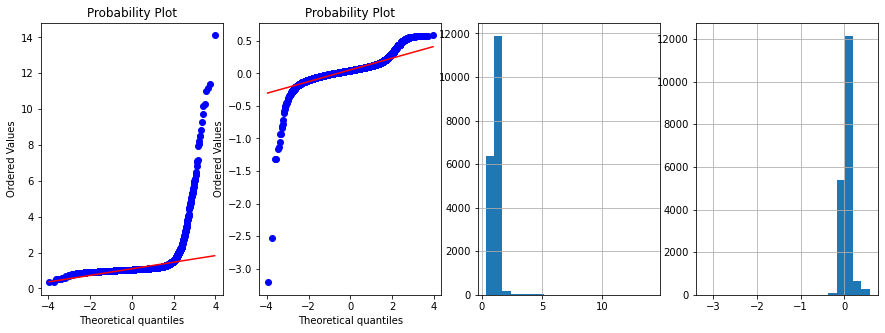

AveHousehold
-0.2969693371570262



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


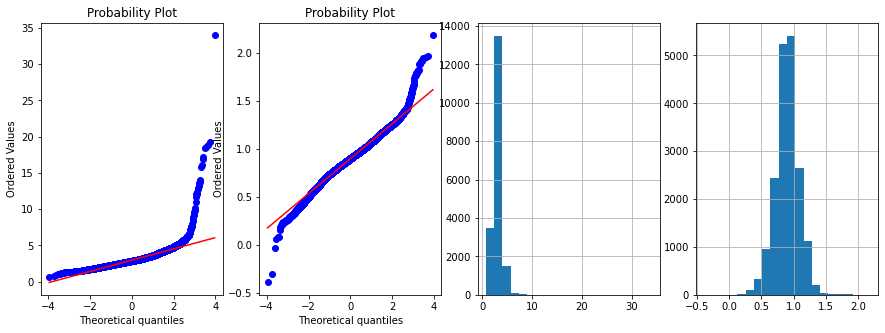

In [238]:
import scipy.stats as stats

for column in aux.columns:
    if column not in ['latitude', 'longitude', 'cluster'] and len(column.split('_'))==1:
        print(column)
        fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
        stats.probplot(aux[column],plot=ax[0])

        aux[column+'_Boxcox'], parameters = stats.boxcox(aux[column])
        print(parameters)

        stats.probplot(aux[column+'_Boxcox'],plot=ax[1])

        aux[column].hist(ax=ax[2], bins=20)

        aux[column+'_Boxcox'].hist(ax=ax[3], bins=20)

    plt.show()

#### Fit

In [180]:
X_5.columns

Index(['AveBedrooms', 'AveHousehold', 'AveRooms', 'anaheim', 'backersfield',
       'distance', 'fresno', 'households', 'housingMedianAge', 'latitude',
       'long beach', 'longitude', 'los angeles', 'medianIncome', 'oakland',
       'population', 'riverside', 'sacramento', 'san diego', 'san francisco',
       'san jose', 'sanat ana', 'totalBedrooms', 'totalRooms'],
      dtype='object')

In [183]:
X_6 = aux[['AveBedrooms_Boxcox', 'AveHousehold_Boxcox', 'AveRooms_Boxcox', 'anaheim_Boxcox', 'backersfield_Boxcox',
       'distance_Boxcox', 'fresno_Boxcox', 'households_Boxcox', 'housingMedianAge_Boxcox', 'latitude',
       'long beach_Boxcox', 'longitude', 'los angeles_Boxcox', 'medianIncome_Boxcox', 'oakland_Boxcox',
       'population_Boxcox', 'riverside_Boxcox', 'sacramento_Boxcox', 'san diego_Boxcox', 'san francisco_Boxcox',
       'san jose_Boxcox', 'sanat ana_Boxcox', 'totalBedrooms_Boxcox', 'totalRooms_Boxcox']]
Y_6 = aux['medianHouseValue_Boxcox']

In [185]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, Y_6, test_size=0.3, random_state=501)
X_train_6_scaled = mm_scaler.fit_transform(X_train_6)
X_test_6_scaled = mm_scaler.transform(X_test_6)

In [186]:
lm6 = LinearRegression()
lm6.fit(X_train_6_scaled,y_train_6)
print(lm6.coef_)
print(lm6.intercept_)
print(lm6.rank_)
print(X_train_6.columns)

[  0.33090997  -2.02217915  -1.02151674   1.68443735   1.33786098
   0.34474582   1.06649766  -4.16691754  -0.1120966   -5.16962263
   0.824277    -3.10214726  -5.15497543   3.87028271  21.45238223
   0.7636815    1.58545217  -0.18767027  -0.83889276 -21.79945515
  -4.30836993  -2.77215369   0.25260861   3.42112804]
59.1983205206607
24
Index(['AveBedrooms_Boxcox', 'AveHousehold_Boxcox', 'AveRooms_Boxcox',
       'anaheim_Boxcox', 'backersfield_Boxcox', 'distance_Boxcox',
       'fresno_Boxcox', 'households_Boxcox', 'housingMedianAge_Boxcox',
       'latitude', 'long beach_Boxcox', 'longitude', 'los angeles_Boxcox',
       'medianIncome_Boxcox', 'oakland_Boxcox', 'population_Boxcox',
       'riverside_Boxcox', 'sacramento_Boxcox', 'san diego_Boxcox',
       'san francisco_Boxcox', 'san jose_Boxcox', 'sanat ana_Boxcox',
       'totalBedrooms_Boxcox', 'totalRooms_Boxcox'],
      dtype='object')


In [241]:
from scipy.special import inv_boxcox
prediction6=lm6.predict(X_test_6_scaled)
y_test_6_inv = inv_boxcox(y_test_6, 0.21872996241526918)
prediction6_inv = inv_boxcox(prediction6, 0.21872996241526918)
print('MAE:',metrics.mean_absolute_error(y_test_6_inv,prediction6_inv))
print('MSA:',metrics.mean_squared_error(y_test_6_inv,prediction6_inv))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_6_inv,prediction6_inv)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_6_inv,prediction6_inv))/y_test_6_inv.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(inv_boxcox(y_train_6,0.21872996241526918), inv_boxcox(lm6.predict(X_train_6_scaled),0.21872996241526918))))

MAE: 37150.54723186698
MSA: 2876370107.9694705
RMSE: 53631.801274705205
RMSE %: 28.12246670352923
RMSE train: 53489.77862649576


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


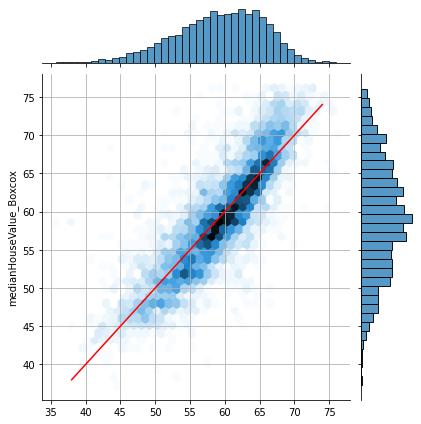

In [206]:
sns.jointplot(prediction6, y_test_6, kind='hex')
plt.plot(range(38,75), range(38,75), color='red')
plt.grid()

Permutation explainer: 12995it [07:28, 28.57it/s]                            


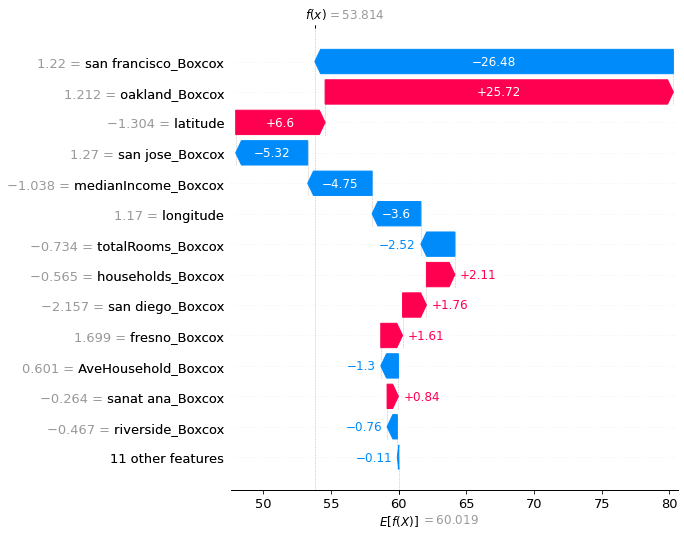

In [237]:
import shap

X100 = shap.utils.sample(X_train_6_scaled, 100)

explainer = shap.Explainer(lm6.predict, X100, feature_names=X_train_6.columns)
shap_values = explainer(X_train_6_scaled)

sample_ind=20
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

So the most important features are the distance to san_francisco, the distance to oakland, the latitude, the distance to san jose and the median income?

#### Try Random forest

In [228]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=501)

In [229]:
rfc.fit(X_train_6_scaled,y_train_6)

RandomForestRegressor(max_depth=100, random_state=501)

In [218]:
predictions = rfc.predict(X_test_6_scaled)

In [242]:
predictions_inv = inv_boxcox(predictions, 0.21872996241526918)
print('MAE:',metrics.mean_absolute_error(y_test_6_inv,predictions_inv))
print('MSA:',metrics.mean_squared_error(y_test_6_inv,predictions_inv))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_6_inv,predictions_inv)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_6_inv,predictions_inv))/y_test_6_inv.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(inv_boxcox(y_train_6, 0.21872996241526918),inv_boxcox(rfc.predict(X_train_6_scaled),0.21872996241526918))))

MAE: 26908.553123472182
MSA: 1735549632.607141
RMSE: 41659.928379764904
RMSE %: 21.844874139700256
RMSE train: 16726.05611876199


In [245]:
sort = np.argsort(rfc.feature_importances_)
feature = X_train_6.columns[sort]
importance = rfc.feature_importances_[sort]

for i in range(24):
    print('{}: {}'.format(feature[i],importance[i]))

anaheim_Boxcox: 0.004928977520596351
oakland_Boxcox: 0.006892766275693412
households_Boxcox: 0.007059817613627786
totalBedrooms_Boxcox: 0.0070974888802467165
sanat ana_Boxcox: 0.007175242142393269
population_Boxcox: 0.008936579900751508
totalRooms_Boxcox: 0.009042296001288475
backersfield_Boxcox: 0.012940168296002988
AveBedrooms_Boxcox: 0.013595711329465038
riverside_Boxcox: 0.015362853979770406
san diego_Boxcox: 0.01566186305416922
distance_Boxcox: 0.01727165395062849
AveRooms_Boxcox: 0.020617158375332137
housingMedianAge_Boxcox: 0.022352476710064594
san francisco_Boxcox: 0.022948879619438207
sacramento_Boxcox: 0.029050457301461434
san jose_Boxcox: 0.02954686768209198
los angeles_Boxcox: 0.03785226513693409
latitude: 0.04064333488279114
longitude: 0.04521572137464501
fresno_Boxcox: 0.046252377588150866
long beach_Boxcox: 0.05021004304115629
AveHousehold_Boxcox: 0.08688396856639544
medianIncome_Boxcox: 0.4424610307769051


The most important features are the median income, average income, and some of the location variables.

### Other features

- try removing the distances to each city and instead create features to select the closest city
- add cluster variable
- A variable saying wether or not the houses are close to the coast would probabily be usefull

In [273]:
for column in list(Big_city['name'].values):
    df[column+'_yes_no'] = df[column]==df['distance']
    aux[column+'_yes_no'] = df[_filter_age & _filter_bedrooms & _filter_household & _filter_rooms & _filter_value][column+'_yes_no']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [276]:
X_rf = aux[['AveBedrooms_Boxcox', 'AveHousehold_Boxcox', 'AveRooms_Boxcox', 'anaheim_yes_no', 'backersfield_yes_no',
       'distance_Boxcox', 'fresno_yes_no', 'households_Boxcox', 'housingMedianAge_Boxcox', 'latitude',
       'long beach_yes_no', 'longitude', 'los angeles_yes_no', 'medianIncome_Boxcox', 'oakland_yes_no',
       'population_Boxcox', 'riverside_yes_no', 'sacramento_yes_no', 'san diego_yes_no', 'san francisco_yes_no',
       'san jose_yes_no', 'sanat ana_yes_no', 'totalBedrooms_Boxcox', 'totalRooms_Boxcox', 'cluster']]
Y_rf = aux['medianHouseValue_Boxcox']

In [278]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.3, random_state=501)

rfc_1 = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=501)

rfc_1.fit(X_train_rf,y_train_rf)

predictions_1 = rfc_1.predict(X_test_rf)


In [280]:
predictions_inv_1 = inv_boxcox(predictions_1, 0.21872996241526918)
y_test_rf_inv = inv_boxcox( y_test_rf, 0.21872996241526918)
print('MAE:',metrics.mean_absolute_error(y_test_rf_inv,predictions_inv_1))
print('MSA:',metrics.mean_squared_error(y_test_rf_inv,predictions_inv_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_rf_inv,predictions_inv_1)))
print('RMSE %:',np.sqrt(metrics.mean_squared_error(y_test_rf_inv,predictions_inv_1))/y_test_rf_inv.mean()*100)
print('RMSE train:',np.sqrt(metrics.mean_squared_error(inv_boxcox(y_train_rf, 0.21872996241526918),inv_boxcox(rfc_1.predict(X_train_rf),0.21872996241526918))))

MAE: 28212.453134564035
MSA: 1885671662.5581462
RMSE: 43424.321094959516
RMSE %: 22.77005424190973
RMSE train: 17320.01194076596


In [282]:
sort = np.argsort(rfc_1.feature_importances_)
feature = X_train_rf.columns[sort]
importance = rfc_1.feature_importances_[sort]

for i in range(25):
    print('{}: {}'.format(feature[i],importance[i]))

san diego_yes_no: 0.00017150160557349834
sanat ana_yes_no: 0.00033284862950764074
anaheim_yes_no: 0.0004829578903881497
long beach_yes_no: 0.0005624462993992779
san jose_yes_no: 0.0010554074280051324
san francisco_yes_no: 0.0019926754482187553
oakland_yes_no: 0.0035463770515414775
los angeles_yes_no: 0.004717173285554748
backersfield_yes_no: 0.004779096126882551
riverside_yes_no: 0.006694100840102303
households_Boxcox: 0.009087154673026331
totalBedrooms_Boxcox: 0.009682154570266804
totalRooms_Boxcox: 0.010893899749806321
population_Boxcox: 0.011636464088198491
AveBedrooms_Boxcox: 0.01725182109527669
fresno_yes_no: 0.018055551363339275
cluster: 0.01919710617036793
sacramento_yes_no: 0.028733301026026333
housingMedianAge_Boxcox: 0.029974555101577906
AveRooms_Boxcox: 0.03191704709853627
distance_Boxcox: 0.03789144275019981
AveHousehold_Boxcox: 0.09405706833153217
longitude: 0.10008455957062884
latitude: 0.10130835564087232
medianIncome_Boxcox: 0.45589493416517096


In [268]:
X_rf = aux[['AveBedrooms_Boxcox', 'AveHousehold_Boxcox', 'AveRooms_Boxcox', 'anaheim_Boxcox', 'backersfield_Boxcox',
       'distance_Boxcox', 'fresno_Boxcox', 'households_Boxcox', 'housingMedianAge_Boxcox', 'latitude',
       'long beach_Boxcox', 'longitude', 'los angeles_Boxcox', 'medianIncome_Boxcox', 'oakland_Boxcox',
       'population_Boxcox', 'riverside_Boxcox', 'sacramento_Boxcox', 'san diego_Boxcox', 'san francisco_Boxcox',
       'san jose_Boxcox', 'sanat ana_Boxcox', 'totalBedrooms_Boxcox', 'totalRooms_Boxcox', 'cluster', ]]
Y_rf = aux['medianHouseValue_Boxcox']

<bound method NDFrame.head of        longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.22     37.86              21.0      7099.0         1106.0   
7        -122.26     37.84              42.0      2555.0          665.0   
14       -122.26     37.85              50.0      1120.0          283.0   
17       -122.26     37.84              50.0      2239.0          455.0   
19       -122.27     37.85              40.0       751.0          184.0   
...          ...       ...               ...         ...            ...   
20634    -121.09     39.48              25.0      1665.0          374.0   
20635    -121.21     39.49              18.0       697.0          150.0   
20636    -121.22     39.43              17.0      2254.0          485.0   
20637    -121.32     39.43              18.0      1860.0          409.0   
20638    -121.24     39.37              16.0      2785.0          616.0   

       population  households  medianIncome  medianHouseValue  cluste